In [3]:
#Try with bad data -- 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

############COnstant Parameters#############
OutputFileExt = ".csv"
OutputCleanedExt = "_Cleaned.csv"
MaxLength = 86400
StartTimeStamp = "00:00:01"
FreqOfData = '1s'

############Configurable Parameters#############
FileName = "TOA5_ExProcessing"
InputPath = "FromPramod/Staton8/bad/"  #"FromPramod/Staton8/good/TOA5_50453_CO2_44_2023_235_0000.dat"
InputFileExt = ".dat"
LengthToPlot = MaxLength  #Max = 86400
WhichColumnToDisplay = "CO2"  #"CO2"  #BattVolt 
OutputPath = InputPath + "/OutFiles/"


#Read Input file and convert to csv
df = pd.read_csv(InputPath + FileName + InputFileExt)
# df = pd.read_csv("FromPramod/Station3/TOA5_50455_CO2_56_2023_257_0000.dat")

#check if output path exists , if no create it
if not (os.path.exists(OutputPath)):
    os.makedirs(OutputPath)
    print("Creating New Directory- OutFiles")

df.to_csv(OutputPath + FileName + OutputFileExt)

dfMain = pd.read_csv(OutputPath + FileName + OutputFileExt,header=None)
# print(df2.head(2))

#Drop index 1,3,4 -- ie, 0,2,3
df2_drop = dfMain.drop([dfMain.index[0], dfMain.index[2],dfMain.index[3]])
# print(df2_drop.head(4))

#Assign new header as columns
new_header = df2_drop.iloc[0]
df2_drop = df2_drop[1:]
df2_drop.columns = new_header
df_new = df2_drop.reset_index(drop=True)



#Cleaning the other 
#read from csv and 
#df2 is our main dataframe -- 

#Set TimeSeries as Index to main data
df_TimeStamp = pd.to_datetime(df_new["TIMESTAMP"])
df2_SetIndex = df_new.set_index(df_TimeStamp)

#Drop column 
# df2_SetIndex = df2_SetIndex.drop('^Unnamed', axis=1)
print(df2_SetIndex.head(3))

#GetDate from Timestamp 
GetDate = pd.to_datetime(df_new["TIMESTAMP"][0]).date()
start_time = pd.Timestamp(str(GetDate) + " " + StartTimeStamp)
GetTimeRange = pd.date_range(start_time,periods=MaxLength, freq=FreqOfData)
print('***********')

#create a dataframe from GetTimeRange
df_TimeSeries_Full = pd.DataFrame(index=GetTimeRange)

# Merge the two DataFrames, filling in NaN for missing values in df2_SetIndex
merged_df = pd.concat([df2_SetIndex, df_TimeSeries_Full], axis=1, join='outer')
print("Printing merged df")
merged_df.to_csv(OutputPath + FileName + "Merged" + OutputFileExt)


/tmp/ipykernel_169993/1776267197.py:24: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(InputPath + FileName + InputFileExt)
/tmp/ipykernel_169993/1776267197.py:34: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  dfMain = pd.read_csv(OutputPath + FileName + OutputFileExt,header=None)


1                              TIMESTAMP   RECORD  Year Month Day_of_Month  \
TIMESTAMP                                                                    
2023-09-22 09:29:58  2023-09-22 09:29:58  3569647  2023     9           22   
2023-09-22 09:29:59  2023-09-22 09:29:59  3569648  2023     9           22   
2023-09-22 09:30:00  2023-09-22 09:30:00  3569649  2023     9           22   

1                   Day_of_Week Day_of_Year Hour Minute Second  ...  \
TIMESTAMP                                                       ...   
2023-09-22 09:29:58           6         265    9     29     58  ...   
2023-09-22 09:29:59           6         265    9     29     59  ...   
2023-09-22 09:30:00           6         265    9     30      0  ...   

1                             CO2            H2O wind_speed wind_direction  \
TIMESTAMP                                                                    
2023-09-22 09:29:58    0.00425426   -0.000668843       0.65            139   
2023-09-22 09:29:59

/tmp/ipykernel_169993/904751592.py:12: DtypeWarning: Columns (1,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Clean = pd.read_csv(OutputPath + FileName + OutputCleanedExt)


  TIMESTAMP  Hour  BattVolt  PTemp  AirTemp  Rh  SBTemp_1360  TargTemp_1360  \
0       NaN   NaN       NaN    NaN      NaN NaN          NaN            NaN   
1       NaN   NaN       NaN    NaN      NaN NaN          NaN            NaN   
2       NaN   NaN       NaN    NaN      NaN NaN          NaN            NaN   
3       NaN   NaN       NaN    NaN      NaN NaN          NaN            NaN   
4       NaN   NaN       NaN    NaN      NaN NaN          NaN            NaN   

   TmV_1360  PAR  CO2  H2O wind_speed wind_direction diag  IncomingSW  \
0       NaN  NaN  NaN  NaN        NaN            NaN  NaN         NaN   
1       NaN  NaN  NaN  NaN        NaN            NaN  NaN         NaN   
2       NaN  NaN  NaN  NaN        NaN            NaN  NaN         NaN   
3       NaN  NaN  NaN  NaN        NaN            NaN  NaN         NaN   
4       NaN  NaN  NaN  NaN        NaN            NaN  NaN         NaN   

   OutgoingSW  IncomingLW  OutgoingLW  Albedo  
0         NaN         NaN         NaN 

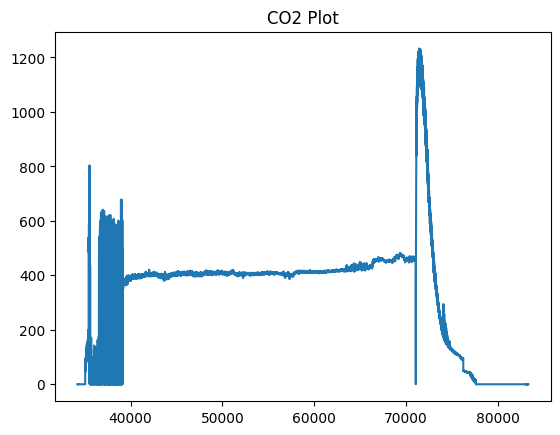

In [4]:
# columnsToDrop = ["RECORD","Year", "Month","Day_of_Month","Day_of_Week","Day_of_Year","Hour","Minute","Second"]
df_new = merged_df
columnsToDrop = ["RECORD","Year", "Month","Day_of_Month","Day_of_Week","Day_of_Year","Minute","Second"]
df_Clean = df_new.drop(columnsToDrop, axis=1)
# print(df_Clean.count())

df_Clean.to_csv(OutputPath + FileName + OutputCleanedExt)



#dataframes available : 
df_Clean = pd.read_csv(OutputPath + FileName + OutputCleanedExt)
# print(df_Clean.head(5))
#Delte first 
df_Clean = df_Clean.loc[:,~df_Clean.columns.str.contains('^Unnamed')]
print(df_Clean.head(5))

#Plot CO2
df_WhichColumn = df_Clean[WhichColumnToDisplay]
df_WhichColumn_Small = df_WhichColumn[:LengthToPlot]
df_WhichColumn_Small.plot()


plt.title(WhichColumnToDisplay + " Plot")
plt.savefig(OutputPath + FileName + "_" + WhichColumnToDisplay + "_Plot.png")
plt.show()